In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

### Exploratory Data Analysis ###

In [2]:
# reading csv
df = pd.read_csv("C:/Users/abbie/Documents/Comp Sci tings/Uni/Aplications of AI/Assignment 2/fraudornormal/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0, 0.5, 'Frequency')

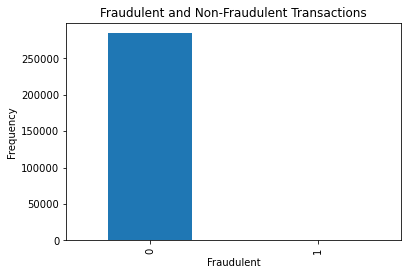

In [3]:
# counting fraudulent and non-fraudlent operations
count_classes = pd.value_counts(df['Class'], sort = False)
# printing graph
count_classes.plot (kind='bar')
plt.title ("Fraudulent and Non-Fraudulent Transactions")
plt.xlabel ("Fraudulent")
plt.ylabel ("Frequency")

<AxesSubplot:ylabel='Frequency'>

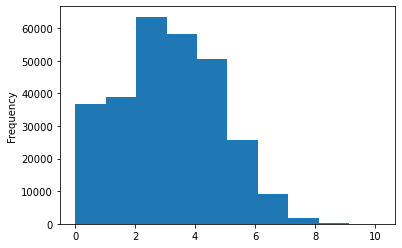

In [4]:
# applying formula to the columns of the df
df['logAmount'] = np.log(df['Amount']+1)
# printing histogram
df['logAmount'].sort_values().plot.hist()

### Testing the data ###

In [5]:
# Scaleing the variable amount
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape (-1,1))
df = df.drop (['Time', 'Amount','logAmount'], axis = 1);

In [6]:
# Separating the data into two arrays with x and y variables respectively
X = df.iloc[:, df.columns != 'Class']
y = df.iloc[:, df.columns == 'Class']
len(y[y.Class ==1]);

In [7]:
#sorting with train test split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)

In [8]:
#Using Multi-layer Perceptron Classifier Neural Network
MLPC = MLPClassifier(hidden_layer_sizes=(400,), max_iter=10000)
scaler = StandardScaler()
# fit to training data
scaler.fit(X_train)
scaler.fit(y_train)
scaler.fit(X_test)
MLPC.fit(X_train, y_train)
X_test = scaler.transform(X_test)
y_pred = MLPC.predict(X_test)
# Recall values
recall_acc = recall_score (y_test,y_pred)
recall_acc 

C:\Users\abbie\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abbie\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


0.5238095238095238

### Unbalanced ###
The accuracy on the above classification is so low because the dataset is unbalanced. Below is a second measure of accuracy using auPRC since a confusion matrix cannot be used due to the unbalanced classification.

In [9]:
def pr(y_test, y_pred):
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)
    auc = metrics.auc(recall, precision)
    
    print('Precision: %s' % precision)
    print('Recall: %s' % recall)
    print('Thresholds: %s' % thresholds)
    print('Naive auPRC: %s' % auc)
    print('Average Precision Score auPRC: %s' % metrics.average_precision_score(y_test, y_pred))
    
pr(y_test, y_pred)

Precision: [0.00172045 0.78571429 1.        ]
Recall: [1.         0.52380952 0.        ]
Thresholds: [0 1]
Naive auPRC: 0.655171534573592
Average Precision Score auPRC: 0.4123838854737148


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.79      0.52      0.63       147

    accuracy                           1.00     85443
   macro avg       0.89      0.76      0.81     85443
weighted avg       1.00      1.00      1.00     85443



### Undersampling ###
I will be using undersampling to control for the unbalanced data. Cases of the majority type (non-fraudulent transactions) will be removed to create a sample of data where the number of non-fraudulent indicies is equal to the number of fraudulent indicies.

In [11]:
# Count fraud cases
number_records_fraud = len (df[df.Class==1])
# Indicies extracted where the cases of fraud and non-fraud are
fraud_indices = np.array (df[df.Class==1].index)
normal_indices = np.array (df[df.Class==0].index)

In [12]:
# Randomly generating a number of non-fraud indicies that is equal to the number of fraud indicies
random_normal_indices = np.random.choice (normal_indices, number_records_fraud, replace = False )
# arrays combined
undersample_indices = np.concatenate ([fraud_indices, random_normal_indices])

In [13]:
undersample_df = df.iloc[undersample_indices,:]
# separate x and y again
X_undersample = undersample_df.iloc [:, undersample_df.columns != 'Class'];
y_undersample = undersample_df.iloc [:, undersample_df.columns == 'Class'];

In [14]:
#sorting train test split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split (X_undersample,y_undersample, test_size = 0.3, random_state = 0)

In [15]:
#Using Multi-layer Perceptron Classifier Neural Network
MLPC = MLPClassifier(hidden_layer_sizes=(400,), max_iter=10000)
scaler.fit(X_train_under)
scaler.fit(y_train_under)
scaler.fit(X_test_under)
MLPC.fit(X_train_under, y_train_under)
X_train = scaler.transform(X_train_under)  
y_pred = MLPC.predict(X_test_under)
# Recall values
recall_acc = recall_score (y_test_under,y_pred)
recall_acc

C:\Users\abbie\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9251700680272109

In [16]:
print(confusion_matrix(y_test_under, y_pred))
print(classification_report(y_test_under, y_pred))

[[144   5]
 [ 11 136]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       149
           1       0.96      0.93      0.94       147

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



In [17]:
def pr(y_test_under, y_pred):
    precision, recall, thresholds = metrics.precision_recall_curve(y_test_under, y_pred)
    auc = metrics.auc(recall, precision)
    
    print('Precision: %s' % precision)
    print('Recall: %s' % recall)
    print('Thresholds: %s' % thresholds)
    print('Naive auPRC: %s' % auc)
    print('Average Precision Score auPRC: %s' % metrics.average_precision_score(y_test_under, y_pred))
    
pr(y_test_under, y_pred)

Precision: [0.49662162 0.96453901 1.        ]
Recall: [1.         0.92517007 0.        ]
Thresholds: [0 1]
Naive auPRC: 0.9634356186407859
Average Precision Score auPRC: 0.92952478096855


In [18]:
print(f"Mean Squared Error: {mean_squared_error(y_test_under, y_pred, sample_weight=None, multioutput='uniform_average', squared=True)}")
print(f"Accuracy: {accuracy_score(y_test_under, y_pred, normalize=True, sample_weight=None)}")
print(f"Precision: {average_precision_score(y_test_under, y_pred, average='macro', pos_label=1, sample_weight=None)}")
print(f"Recall: {recall_score(y_test_under, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')}")
print(f"Receiver Operating Curve: {roc_curve(y_test_under, y_pred, pos_label=None, sample_weight=None, drop_intermediate=True)}")

Mean Squared Error: 0.05405405405405406
Accuracy: 0.9459459459459459
Precision: 0.92952478096855
Recall: 0.9251700680272109
Receiver Operating Curve: (array([0.        , 0.03355705, 1.        ]), array([0.        , 0.92517007, 1.        ]), array([2, 1, 0], dtype=int64))
